# CMS Leptonic Decay Analysis

This activity uses data from the CMS detector at CERN's LHC. It's actually the same activity we've used in [Quarknet's Data Camp at Fermilab](https://quarknet.i2u2.org/content/quarknet-data-camp) for several years, but using Python to pick it apart instead of a spreadsheet. The files contain collision events. You'll begin by looking at the events which included two muons in the decay products. 

To get started,
- First, click the disc icon at the top to save the notebook. That makes it easier to start over later if you need to.
- Go to the menu bar above and select **Kernel > Restart & Run All**.
- You won't hurt anything by experimenting. If you break it, go to **File > Revert to checkpoint** to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Jupyter activity](./Intro_to_Jupyter.ipynb) and come back here. 

When you're ready, scroll down to **Part One**.

In [1]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

In [2]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does

two_u = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Muon_Run2011A.csv')
# two_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Electron_Run2011A.csv')
# one_u = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Single_Muon_Run2011A.csv')
# one_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Single_Electron_Run2011A.csv')

data = two_u

In [3]:
# The .head(n) command displays the first n rows of a file.
data.head(3)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,74601703,G,9.69873,-9.51043,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.32771,-1.152370,6.34728,7.41776,0.775564,-0.155984,1
1,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.27397,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.34394,-0.473505,8.79849,4.36967,1.449670,-0.108575,1


In [4]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(475465, 20)

## Part One
Let's get acquainted with this dimuon data set. Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?
- How many events does this data set contain?

In [5]:
# You can specify a column by dataset.columnName (e.g., two_u.E1)
# This makes a new column called "totalE" and fills it with (E1 + E2) for each event
data['totalE'] = data.E1 + data.E2

In [6]:
# This makes a new column called "Esquared" and fills it with E1^2 for each event
data['Esquared'] = data.E1**2

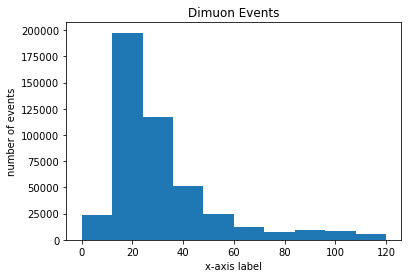

In [7]:
# makes the histogram
plt.hist(data.totalE, bins=10, range=[0,120], log=False)
plt.title("Dimuon Events")
plt.xlabel("x-axis label")
plt.ylabel("number of events")

## Part Two
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram above.
- What do you think the histogram above is showing? Try looking in the cell just before the graph to see the code that made it.
- The x-axis label looks like it could use some work. Try typing a better label in the code before the graph. Then, "execute" the cell by pressing shift+enter or clicking the "play" icon in the toolbar.
- It's also customary to plot this type of data on a log scale. Try that out.
- The Z boson has a mass of around 90 GeV and can decay into two muons. Does your data incidate Z production? Tinkering with the histogram's range and number of bins might help your search.

## Part Three
Try one of the following
- Create a histogram to show the production of one of the [J/$\Psi$](https://en.wikipedia.org/wiki/J/psi_meson) or [Upsilon](https://en.wikipedia.org/wiki/Upsilon_meson) ($\Upsilon$).
- (more coding) Look at a different decay channel. The second code cell in this activity (probably labeled "ln[2]") gives you some options.
- (more math) If we're particle hunting, the previous plot really isn't the one we need. The mass of a particle isn't just equal to the toal energy of its decay products. If you recall what a relativistic 4-vector is, that could help replot your mass reconstruction more accurately.

## More tools
The cells below show some sillier or more advanced tehniques.

In [8]:
# run this command to make your plots look like they're from xkcd.com
plt.xkcd()
# then re-execute your code to make a plot and see it xkcd-ified.

In [9]:
# run this cell to make normal-looking plots again
mpl.rcParams.update(inline_rc)

In [10]:
# calculates descriptive statistics
data.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE,Esquared
count,475465.000000,4.754650e+05,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,4.754650e+05
mean,167785.943119,4.788622e+08,21.902022,-0.107231,-0.713106,-1.040151,10.942925,-0.094117,-0.112941,0.035100,15.896824,0.069391,0.675708,0.800491,10.901173,0.078403,0.112177,-0.035100,37.798845,1.357284e+03
std,3698.877156,5.593981e+08,29.624106,11.627325,12.127312,32.762900,10.846589,1.299287,1.821436,0.999385,18.554144,10.839557,10.951980,18.931736,15.769593,0.952914,1.804345,0.999385,42.567515,1.095533e+05
min,160957.000000,9.000000e+01,2.705040,-2872.290000,-3846.230000,-7237.650000,0.086912,-2.399940,-3.141590,-1.000000,2.576120,-250.267000,-1339.220000,-612.048000,0.133530,-2.399860,-3.141550,-1.000000,5.951600,7.317241e+00
25%,165617.000000,1.125653e+08,9.098770,-4.789810,-5.115530,-11.209200,5.280940,-1.255120,-1.694370,-1.000000,6.950840,-4.642460,-4.224930,-4.953800,5.202850,-0.610616,-1.428470,-1.000000,17.568030,8.278762e+01
50%,166701.000000,2.579929e+08,13.723900,-0.110537,-0.736226,-1.589870,7.391320,-0.177596,-0.216865,1.000000,10.053400,0.072385,0.662365,0.647675,7.321510,0.085832,0.203961,-1.000000,25.266530,1.883454e+02
75%,172791.000000,6.068714e+08,22.591000,4.677240,4.227450,9.587310,11.611000,1.110350,1.456980,1.000000,17.065000,4.704260,5.070920,6.379760,11.600600,0.764926,1.672350,1.000000,39.372700,5.103533e+02
max,173692.000000,3.056722e+09,8684.880000,505.579000,265.895000,843.854000,969.958000,2.399960,3.141560,1.000000,1604.970000,528.899000,326.782000,709.011000,7921.690000,2.399900,3.141550,1.000000,8708.483800,7.542714e+07


In [11]:
# Making cuts on your data (i.e., filtering your data set)
eta_cut = data.query('eta1 > 2 & eta2 > 2')
eta_cut.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE,Esquared
19,165617,74751994,G,44.22470,8.09262,7.920330,42.75040,11.32350,2.03874,0.774639,...,17.19590,-2.855870,-3.237140,16.64490,4.31683,2.05913,-2.293700,1,61.42060,1955.824090
78,165617,75833588,G,181.87700,44.14270,-14.949800,175.80400,46.60550,2.03792,-0.326545,...,170.02100,-34.630100,12.324800,166.00000,36.75790,2.21282,2.799670,-1,351.89800,33079.243129
133,165617,75682819,G,22.60670,5.02668,-0.315528,22.03830,5.03658,2.18201,-0.062688,...,17.87970,2.798720,2.056710,17.53880,3.47317,2.32216,0.633751,-1,40.48640,511.062885
502,165617,80486266,G,18.52970,2.22363,-2.808580,18.17980,3.58227,2.32703,-0.901120,...,5.33630,0.583167,-0.938683,5.21955,1.10508,2.25666,-1.014890,-1,23.86600,343.349782
590,165617,79051358,G,6.63246,-0.24928,1.342030,6.48962,1.36499,2.26309,1.754450,...,4.93516,0.713877,0.714097,4.82961,1.00973,2.26898,0.785552,-1,11.56762,43.989526


In [12]:
# here's another example
type_cut = data.query('Type1 == "G" & Type2 == "T"')
type_cut.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE,Esquared
5,165617,74570517,G,14.94220,-9.17441,-10.320300,-5.70786,13.80870,-0.402405,-2.297480,...,2.98793,-0.986225,0.354098,-2.796160,1.047870,-1.708030,2.79688,1,17.93013,223.269341
67,165617,74633433,G,9.60951,1.28362,3.999930,-8.64202,4.20085,-1.468930,1.260270,...,4.65567,-2.271380,-4.004360,0.685588,4.603700,0.148376,-2.08677,1,14.26518,92.342682
81,165617,74832715,G,8.09718,4.61267,-1.838860,6.39492,4.96570,1.071000,-0.379345,...,3.51313,-0.530458,0.688020,3.402380,0.868767,2.074220,2.22760,1,11.61031,65.564324
93,165617,75612982,G,7.55441,1.29129,-5.358840,-5.16462,5.51223,-0.836073,-1.334340,...,3.84161,-0.989578,-3.454830,-1.353400,3.593760,-0.368220,-1.84976,1,11.39602,57.069110
97,165617,75283124,G,9.31889,2.23509,0.874926,9.00385,2.40023,2.032540,0.373114,...,3.68160,-1.891880,-3.155900,0.064037,3.679530,0.017403,-2.11083,1,13.00049,86.841711


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  app.launch_new_instance()


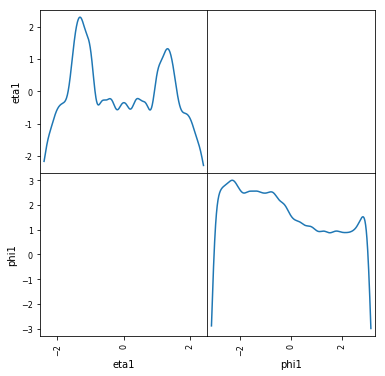

In [13]:
# Creates a matrix of pair plots. FYI: this takes a long time for 3+ columns
newdata = data[['eta1','phi1']]
pd.scatter_matrix(newdata, s=.001, figsize=(6, 6), diagonal='kde');

## Saving Your Work
This is running on a Google Compute Engine server on a distant planet and deletes what you've done after 20 minutes of inactivity. To save for later use or analysis you have a few options:
- File > Download as > ipynb (to continue your analysis later)
- File > Download as > pdf (static copy including code and graphs)
- Right-click on a graph and select Save Image As ... (to share a pic)

## Credits
This notebook was designed by [Quarknet](https://quarknet.i2u2.org/) Teaching and Learning Fellow, Adam LaMee. Find more coding activities for K-12 and license info at his website [adamlamee.com](https://adamlamee.github.io/). The handy csv files were created from run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site, like [here](http://opendata.cern.ch/record/545). Finally, thanks to the great folks at [MyBinder.org](https://beta.mybinder.org/) this notebook is interactive without you needing to download it or install Jupyter on your own device.